In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pipe import take_while

In [2]:
# (tinklo) žingsnis: τ, h
# σ - ta konstanta prie k_n

In [3]:
def range(start, step):
  while True:
    yield start 
    start += step

In [4]:
# u' = x^2 ln(u+x) − x
f = lambda x, u: np.pow(x, 2) * np.log(u + x) - x

In [5]:
def RungeKutta4(fn, lower_bound = 0, upper_bound = 1, tau = 0.1):
  y = [0] # (t_0, y_0) = (lower_bound, 0)
  ts = list(range(lower_bound + tau, tau) | take_while(lambda t: t <= (upper_bound + tau/10)))

  k1 = lambda t_n: fn(t_n,         y[-1])
  k2 = lambda t_n: fn(t_n + tau/2, y[-1] + tau * k1(t_n) / 2)
  k3 = lambda t_n: fn(t_n + tau/2, y[-1] + tau * k2(t_n) / 2)
  k4 = lambda t_n: fn(t_n + tau,   y[-1] + tau * k3(t_n))
  y_n_plus_one = lambda t_n: y[-1] + (tau/6)*(k1(t_n) + 2*k2(t_n) + 2*k3(t_n) + k4(t_n))
  

  for t in ts:
    y.append(y_n_plus_one(t))
  
  ret = [lower_bound] + ts, y
  print(ret[0])
  print(ret[1])
  print('------')
  return ret

rk4_ts1, rk4_ys1 = RungeKutta4(f, tau = 0.05)
rk4_ts2, rk4_ys2 = RungeKutta4(f, tau = 0.1)
ts = rk4_ts1

[0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003, 1.0000000000000002]
[0, np.float64(-0.00449845315869339), np.float64(-0.012433692917218134), np.float64(-0.02402329261049249), np.float64(-0.03943329519512514), np.float64(-0.05880610423261054), np.float64(-0.08227947830801705), np.float64(-0.11000233814165469), np.float64(-0.14215015230852107), np.float64(-0.17894195878295294), np.float64(-0.2206612524452069), np.float64(-0.26768387524341253), np.float64(-0.3205180693353967), np.float64(-0.37986614739994684), np.float64(-0.4467268957408512), np.float64(-0.5225820351061502), np.float64(-0.6097811097830517), np.float64(-0.7125046805793123), np.float64(-0.8402293464627572), np.float64(nan), np.float64(nan)]
------
[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.

/var/folders/1_/2844xjnn0l7_tb5m4cq4th080000gp/T/ipykernel_44530/1800199372.py:2: RuntimeWarning: invalid value encountered in log
  f = lambda x, u: np.pow(x, 2) * np.log(u + x) - x


In [6]:
def RungeKutta2(fn, lower_bound = 0, upper_bound = 1, tau = 0.1):
  y = [0] # (t_0, y_0) = (lower_bound, 0)
  # ts = list(range(lower_bound + tau, tau) | take_while(lambda t: t <= upper_bound))
  ts = list(range(lower_bound + tau, tau) | take_while(lambda t: t <= (upper_bound + tau/10)))

  k1 = lambda t_n: fn(t_n,         y[-1])
  k2 = lambda t_n: fn(t_n + tau/2, y[-1] + tau * k1(t_n) / 2)
  y_n_plus_one = lambda t_n: y[-1] + (tau/2)*(k1(t_n) + k2(t_n))

  for t in ts:
    y.append(y_n_plus_one(t))
  
  ret = [lower_bound] + ts, y
  print(ret[0])
  print(ret[1])
  print('------')
  return ret

rk2_ts1, rk2_ys1 = RungeKutta2(f, tau = 0.05)
rk2_ts2, rk2_ys2 = RungeKutta2(f, tau = 0.1)

[0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003, 1.0000000000000002]
[0, np.float64(-0.003679210554789182), np.float64(-0.01072324183911838), np.float64(-0.021362954406840468), np.float64(-0.035766975145019864), np.float64(-0.054073184528606606), np.float64(-0.07640867598104834), np.float64(-0.10290534813027423), np.float64(-0.13371417538327354), np.float64(-0.16902008943325783), np.float64(-0.20905925382734164), np.float64(-0.2541409402880702), np.float64(-0.304677311044642), np.float64(-0.3612266686982237), np.float64(-0.4245604243074651), np.float64(-0.4957744751417189), np.float64(-0.5764915616426166), np.float64(-0.6692758382775421), np.float64(-0.7786510783835867), np.float64(-0.9145586672787535), np.float64(-1.1247069750932273)]
------
[0, 0.1, 0.2, 0.30000000

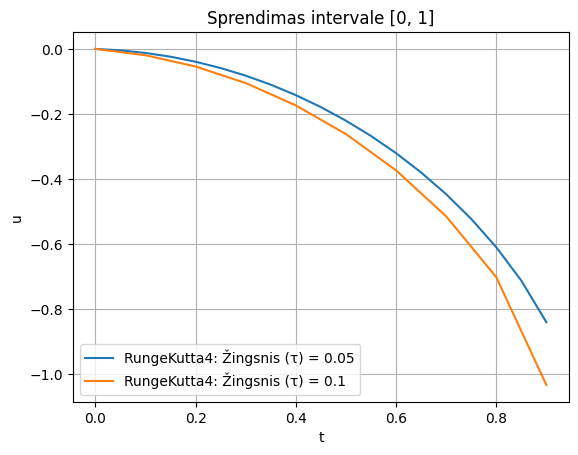

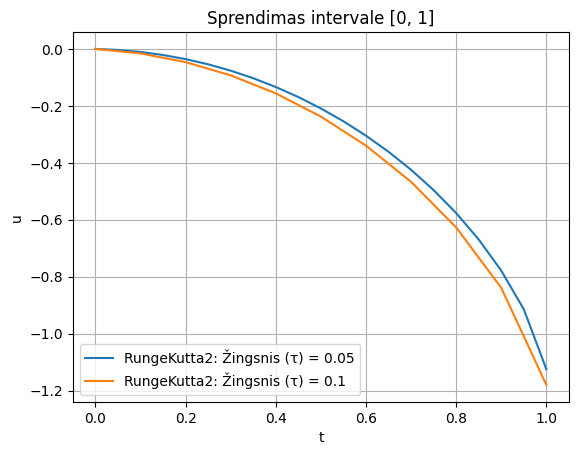

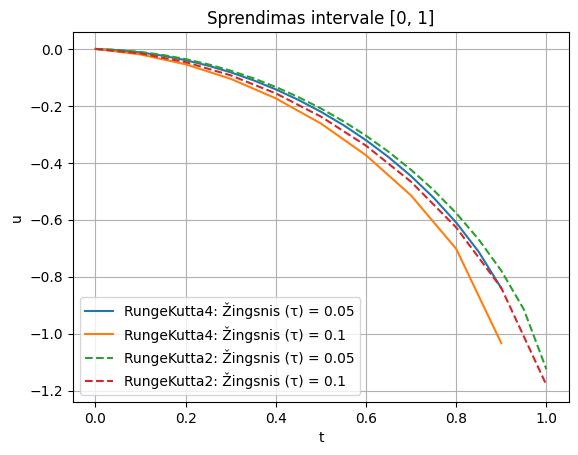

In [7]:
plt.plot(rk4_ts1, rk4_ys1, label='RungeKutta4: Žingsnis (τ) = 0.05')
plt.plot(rk4_ts2, rk4_ys2, label='RungeKutta4: Žingsnis (τ) = 0.1')
plt.xlabel('t')
plt.ylabel('u')
plt.title('Sprendimas intervale [0, 1]')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(rk2_ts1, rk2_ys1, label='RungeKutta2: Žingsnis (τ) = 0.05')
plt.plot(rk2_ts2, rk2_ys2, label='RungeKutta2: Žingsnis (τ) = 0.1')
plt.xlabel('t')
plt.ylabel('u')
plt.title('Sprendimas intervale [0, 1]')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(rk4_ts1, rk4_ys1, label='RungeKutta4: Žingsnis (τ) = 0.05')
plt.plot(rk4_ts2, rk4_ys2, label='RungeKutta4: Žingsnis (τ) = 0.1')
plt.plot(rk2_ts1, rk2_ys1, '--', label='RungeKutta2: Žingsnis (τ) = 0.05')
plt.plot(rk2_ts2, rk2_ys2, '--', label='RungeKutta2: Žingsnis (τ) = 0.1')
plt.xlabel('t')
plt.ylabel('u')
plt.title('Sprendimas intervale [0, 1]')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
_, ys1 = RungeKutta2(f, tau = 0.05)
_, ys2 = RungeKutta2(f, tau = 0.1)
y_tau = ys1[-1] # tau 
y_2tau = ys2[-1] # 2*tau 

p = 2
error = abs(y_2tau - y_tau) / (2**p - 1)
error, y_tau, y_2tau

[0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003, 1.0000000000000002]
[0, np.float64(-0.003679210554789182), np.float64(-0.01072324183911838), np.float64(-0.021362954406840468), np.float64(-0.035766975145019864), np.float64(-0.054073184528606606), np.float64(-0.07640867598104834), np.float64(-0.10290534813027423), np.float64(-0.13371417538327354), np.float64(-0.16902008943325783), np.float64(-0.20905925382734164), np.float64(-0.2541409402880702), np.float64(-0.304677311044642), np.float64(-0.3612266686982237), np.float64(-0.4245604243074651), np.float64(-0.4957744751417189), np.float64(-0.5764915616426166), np.float64(-0.6692758382775421), np.float64(-0.7786510783835867), np.float64(-0.9145586672787535), np.float64(-1.1247069750932273)]
------
[0, 0.1, 0.2, 0.30000000

(np.float64(0.0184328415364939),
 np.float64(-1.1247069750932273),
 np.float64(-1.180005499702709))

In [9]:
_, ys1 = RungeKutta4(f, tau = 0.05)
_, ys2 = RungeKutta4(f, tau = 0.1)
y_tau = ys1[-3] # tau 
y_2tau = ys2[-3] # 2*tau 

p = 4
error = abs(y_2tau - y_tau) / (2**p - 1)
error, y_tau, y_2tau

[0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003, 1.0000000000000002]
[0, np.float64(-0.00449845315869339), np.float64(-0.012433692917218134), np.float64(-0.02402329261049249), np.float64(-0.03943329519512514), np.float64(-0.05880610423261054), np.float64(-0.08227947830801705), np.float64(-0.11000233814165469), np.float64(-0.14215015230852107), np.float64(-0.17894195878295294), np.float64(-0.2206612524452069), np.float64(-0.26768387524341253), np.float64(-0.3205180693353967), np.float64(-0.37986614739994684), np.float64(-0.4467268957408512), np.float64(-0.5225820351061502), np.float64(-0.6097811097830517), np.float64(-0.7125046805793123), np.float64(-0.8402293464627572), np.float64(nan), np.float64(nan)]
------
[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.

/var/folders/1_/2844xjnn0l7_tb5m4cq4th080000gp/T/ipykernel_44530/1800199372.py:2: RuntimeWarning: invalid value encountered in log
  f = lambda x, u: np.pow(x, 2) * np.log(u + x) - x


(np.float64(nan), np.float64(nan), np.float64(-1.0332142058464764))